In [1]:
import json

positive_phantom_files = json.load(open("data/positive_phantom_files.json"))
negative_phantom_files = json.load(open("data/negative_phantom_files.json"))
print(len(positive_phantom_files), len(negative_phantom_files))

14376 4933


In [2]:
import os

positive_phantom_file_cnt = {}
for name, values in positive_phantom_files.items():
    for fname, _ in values["phantom_file"]:
        f = os.path.basename(fname)
        positive_phantom_file_cnt[f] = positive_phantom_file_cnt.get(f, set())
        positive_phantom_file_cnt[f].add(name)

positive_phantom_file_cnt = {k: len(v) for k, v in positive_phantom_file_cnt.items()}
positive_phantom_file_cnt = sorted(
    positive_phantom_file_cnt.items(), key=lambda x: x[1], reverse=True
)

negative_phantom_file_cnt = {}
for name, values in negative_phantom_files.items():
    for fname, _ in values["phantom_file"]:
        f = os.path.basename(fname)
        negative_phantom_file_cnt[f] = negative_phantom_file_cnt.get(f, set())
        negative_phantom_file_cnt[f].add(name)
negative_phantom_file_cnt = {k: len(v) for k, v in negative_phantom_file_cnt.items()}
negative_phantom_file_cnt = sorted(
    negative_phantom_file_cnt.items(), key=lambda x: x[1], reverse=True
)

print(len(positive_phantom_file_cnt), len(negative_phantom_file_cnt))

121786 44515


In [3]:
for k, v in positive_phantom_file_cnt[:10]:
    print(f"{k}\t{v}\t{v/len(positive_phantom_files):.1%}")
print("====================")
for k, v in negative_phantom_file_cnt[:10]:
    print(f"{k}\t{v}\t{v/len(negative_phantom_files):.1%}")

setup.cfg	12377	86.1%
setup.py	2309	16.1%
__init__.py	916	6.4%
README.md	660	4.6%
MANIFEST.in	477	3.3%
_version.py	413	2.9%
LICENSE	355	2.5%
pyproject.toml	322	2.2%
README.rst	320	2.2%
version.py	312	2.2%
setup.cfg	4566	92.6%
setup.py	3769	76.4%
README.md	3008	61.0%
__init__.py	2157	43.7%
pyproject.toml	1612	32.7%
LICENSE	1376	27.9%
MANIFEST.in	384	7.8%
README.rst	373	7.6%
LICENSE.txt	291	5.9%
utils.py	285	5.8%


In [4]:
positive_phantom_pyfile_cnt = [
    [k, _] for k, _ in positive_phantom_file_cnt if k.endswith(".py")
]
negative_phantom_pyfile_cnt = [
    [k, _] for k, _ in negative_phantom_file_cnt if k.endswith(".py")
]
print(len(positive_phantom_pyfile_cnt), len(negative_phantom_pyfile_cnt))
for k, v in positive_phantom_pyfile_cnt[:10]:
    print(f"{k}\t{v}\t{v/len(positive_phantom_files):.1%}")
print("====================")
for k, v in negative_phantom_pyfile_cnt[:10]:
    print(f"{k}\t{v}\t{v/len(negative_phantom_files):.1%}")

38523 23878
setup.py	2309	16.1%
__init__.py	916	6.4%
_version.py	413	2.9%
version.py	312	2.2%
utils.py	171	1.2%
__main__.py	161	1.1%
config.py	92	0.6%
exceptions.py	91	0.6%
conf.py	81	0.6%
base.py	79	0.5%
setup.py	3769	76.4%
__init__.py	2157	43.7%
utils.py	285	5.8%
main.py	214	4.3%
conf.py	189	3.8%
example.py	187	3.8%
__main__.py	172	3.5%
conftest.py	155	3.1%
base.py	148	3.0%
config.py	139	2.8%


In [5]:
import pandas as pd

df = pd.read_csv("data/validator_dataset.csv", low_memory=False, keep_default_na=False)
print(df["label"].value_counts().rename({0: "Match", 1: "Mismatch"}))

df.groupby("label")["setup_change"].value_counts().rename(
    {0: "Match", 1: "Mismatch"}, level=0
).rename({0: "no", 1: "yes"}, level=1).reset_index(name="count").pivot(
    index="label", columns="setup_change", values="count"
)

Match       14376
Mismatch     4933
Name: label, dtype: int64


setup_change,no,yes
label,,
Match,11968,2408
Mismatch,92,4841


In [6]:
df.groupby("label")[
    [
        "num_phantom_pyfiles",
        "num_downloads",
        "num_maintainers",
        "num_maintainer_pkgs",
        "maintainer_max_downloads",
    ]
].describe().stack(level=0)

25%      50%         75%    count  \
label                                                                   
0     maintainer_max_downloads  2838.00  45483.5  1138050.00  14376.0   
      num_downloads              957.75   5572.5   130771.25  14376.0   
      num_maintainer_pkgs          3.00      8.0       25.00  14376.0   
      num_maintainers              1.00      1.0        2.00  14376.0   
      num_phantom_pyfiles          0.00      0.0        0.00  14376.0   
1     maintainer_max_downloads   122.00    358.0     1574.00   4933.0   
      num_downloads               79.00    140.0      364.00   4933.0   
      num_maintainer_pkgs          1.00      2.0        5.00   4933.0   
      num_maintainers              1.00      1.0        1.00   4933.0   
      num_phantom_pyfiles          1.00      2.0        5.00   4933.0   

                                        max          mean  min           std  
label                                                                         
0     maintainer_max_downloads  523542637.0  1.057890e+07  0.0  4.003142e+07  
      num_downloads             523542637.0  1.349194e+06  0.0  1.110493e+07  
      num_maintainer_pkgs           13834.0  4.334864e+01  0.0  1.608058e+02  
      num_maintainers                  30.0  1.652824e+00  0.0  1.308228e+00  
      num_phantom_pyfiles           12633.0  4.806553e+00  0.0  1.384666e+02  
1     maintainer_max_downloads  317319809.0  4.913687e+05  0.0  8.152014e+06  
      num_downloads               1025260.0  1.009186e+03  0.0  1.528706e+04  
      num_maintainer_pkgs             737.0  1.351125e+01  0.0  4.085446e+01  
      num_maintainers                  13.0  1.044598e+00  0.0  3.574569e-01  
      num_phantom_pyfiles           18956.0  1.699574e+01  0.0  2.882635e+02

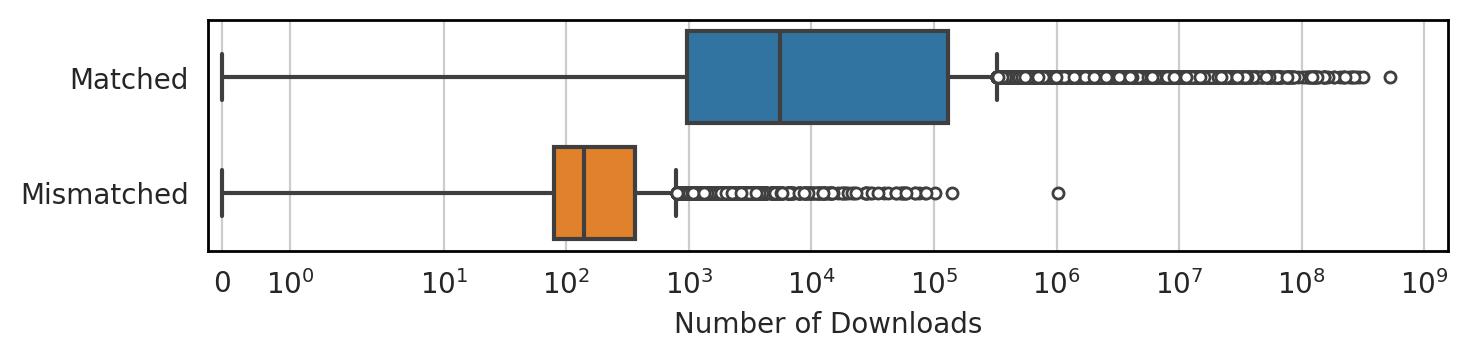

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


def plot_download_dist(data):
    with sns.axes_style("whitegrid"):
        # sns.set_style("whitegrid")
        fig, ax = plt.subplots(figsize=(8, 1.5))
        ax.set_xscale("symlog", base=10)
        sns.boxplot(
            data,
            x="num_downloads",
            y="label",
            orient="h",
            showfliers=True,
            flierprops={"marker": "o", "markerfacecolor": "white", "markersize": 4},
            ax=ax,
        )
        ax.set_xlim(-0.2)
        ax.set_yticklabels(["Matched", "Mismatched"])
        ax.set_ylabel(None)
        ax.set_xlabel("Number of Downloads")
        for spine in ax.spines.values():
            spine.set_color("black")
            spine.set_linewidth(1)

        fig.savefig("figures/download_comparison.pdf", bbox_inches="tight")


plot_download_dist(df)

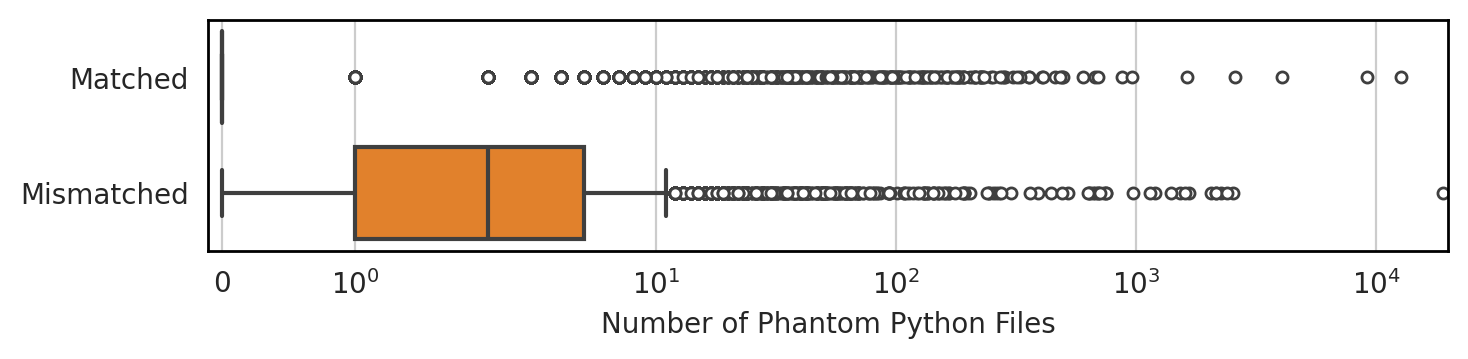

In [8]:
def plot_phantom_pyfiles_dist(data):
    with sns.axes_style("whitegrid"):
        # sns.set_style("whitegrid")
        fig, ax = plt.subplots(figsize=(8, 1.5))
        sns.boxplot(
            data,
            x="num_phantom_pyfiles",
            y="label",
            orient="h",
            showfliers=True,
            flierprops={"marker": "o", "markerfacecolor": "white", "markersize": 4},
            ax=ax,
        )
        ax.set_xscale("symlog", base=10)
        ax.set_xlim(-0.1)
        ax.set_yticklabels(["Matched", "Mismatched"])
        ax.set_ylabel(None)
        ax.set_xlabel("Number of Phantom Python Files")
        for spine in ax.spines.values():
            spine.set_color("black")
            spine.set_linewidth(1)

        fig.savefig("figures/phantom_pyfiles_comparison.pdf", bbox_inches="tight")


plot_phantom_pyfiles_dist(df)